# Import modules/ libraries

In [89]:
import os
import sys
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from IPython.display import Image, Markdown
import seaborn as sns
plt.style.use('seaborn')
from __future__ import print_function, division
import datetime
from datetime import datetime as dt
from scipy.ndimage.filters import generic_filter
import pickle
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import svm, datasets
plt.style.use('seaborn')

%matplotlib inline

# Import all data

In [90]:
with open('all_product_listings_for_modeling_list_price.pkl', 'rb') as picklefile: 
    all_product_listings_for_modeling_list_price = pickle.load(picklefile)

In [91]:
with open('all_product_listings_for_modeling_log_price.pkl', 'rb') as picklefile: 
    all_product_listings_for_modeling_log_price = pickle.load(picklefile)

In [92]:
all_product_listings_for_modeling_list_price.columns

Index(['num_cust_reviews', 'list_price', 'avg_cust_review',
       'num_answered_questions', 'product_discounts', 'time_on_market',
       'other_sellers_boolean', 'expedited_shipping_boolean',
       'num_bullets_description', 'product_specs_image_boolean',
       'num_specs_bullets', 'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'num_cust_review_squared',
       'avg_cust_review_squared', 'num_answered_questions_squared'],
      dtype='object')

In [93]:
all_product_listings_for_modeling_log_price.columns

Index(['num_cust_reviews', 'avg_cust_review', 'num_answered_questions',
       'product_discounts', 'time_on_market', 'other_sellers_boolean',
       'expedited_shipping_boolean', 'num_bullets_description',
       'product_specs_image_boolean', 'num_specs_bullets',
       'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'log_price', 'num_cust_review_squared',
       'avg_cust_review_squared', 'num_answered_questions_squared'],
      dtype='object')

# Prepare the test/train sets

## Start with making the list_price itself a target

In [94]:
# Save all the variables that are not list_price into vector X 
# Save list_price (our target) into y 

X = all_product_listings_for_modeling_list_price[[x for x in all_product_listings_for_modeling_list_price.columns if x != 'list_price']]
y = all_product_listings_for_modeling_list_price['list_price']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=30)

In [95]:
# Scale the train and validation data
ssX = StandardScaler()
 
# Fit_transform figures fit(out mean and std). 
# Then transforms (using the value from the fit x-mu for each datapoint)

# Fit and transform the training data
X_train = ssX.fit_transform(X_train)

# Validate and transform the validation data
X_val = ssX.transform(X_val)

In [96]:
X_train

array([[-0.12677402,  0.4018086 , -0.32813459, ..., -0.12174417,
         0.20680303, -0.14050459],
       [-0.28822979,  0.66740446, -0.32813459, ..., -0.12523577,
         0.68789436, -0.14050459],
       [-0.30168444, -1.66983912, -0.32813459, ..., -0.12525655,
        -1.55642568, -0.14050459],
       ...,
       [-0.29495712,  0.24245108, -0.32813459, ..., -0.12525136,
        -0.05402962, -0.14050459],
       [-0.27813881,  0.82676197, -0.32813459, ..., -0.12519291,
         1.00437131, -0.14050459],
       [-0.25122951,  0.45492777, -0.32813459, ..., -0.12496429,
         0.29838427, -0.14050459]])

## Make the log_price a target as well

In [97]:
X_log = all_product_listings_for_modeling_log_price[[x for x in all_product_listings_for_modeling_log_price.columns if x != 'log_price']]
y_log = all_product_listings_for_modeling_log_price['log_price']
X_train_log, X_val_log, y_train_log, y_val_log = train_test_split(X_log, y_log, test_size=0.1, random_state=30)

In [98]:
# Scale the train and validation data
ssX = StandardScaler()
 
# Fit_transform figures fit(out mean and std). 
# Then transforms (using the value from the fit x-mu for each datapoint)

# Fit and transform the training data
X_train_log = ssX.fit_transform(X_train_log)

# Validate and transform the validation data
X_val_log = ssX.transform(X_val_log)

# Obtain a linear model fit on the test/train sets for regular price

In [99]:
# Obtain the linear regression model 
lm = linear_model.LinearRegression()

# Fit the training data to the linear model
linear_model_fit = lm.fit(X_train, y_train)

# Apply the linear model to the validation data to obtain predictions 
linear_predictions_validation = lm.predict(X_val)
linear_predictions_validation

array([12.27112738, 29.35399443, 14.22584177, 30.86943656, 11.56571446,
       21.84827978, 16.87078604, 14.11600149, 27.69860679, 27.65209935,
       41.671646  , 30.77120467, 72.42614327,  8.43755885, 26.88434039,
       29.05207002])

In [100]:
linear_predictions_train = lm.predict(X_train)

In [101]:
# My R^2 score seems to be a pretty low score. I'm only account for 37% of the variance.
lm.score(X_train, y_train)

0.37285638142468003

# Obtain the linear model fit on the test/train sets for log price

In [102]:
# Fit the training data to the linear model
linear_model_fit_log = lm.fit(X_train_log, y_train_log)

# Apply the linear model to the validation data to obtain predictions 
linear_predictions_validation_log = lm.predict(X_val_log)
linear_predictions_validation_log

array([2.52172471, 3.17551856, 3.05682377, 3.17492084, 2.75115998,
       2.94910032, 3.0056825 , 2.87072618, 2.95506165, 3.15138484,
       3.42456371, 3.13803373, 3.89957072, 2.87822134, 3.04032702,
       3.27652719])

In [103]:
linear_predictions_train_log = lm.predict(X_train_log)

In [104]:
# The R^2 score is worse with the log test/train sets
lm.score(X_train_log, y_train_log)

0.32587001605500754

# Get baseline OLS

In [105]:
# Create your feature matrix (X) and target vector (y)
# Get baseline without the squared features 
y_patsy, X_patsy = patsy.dmatrices('list_price ~ num_cust_reviews + avg_cust_review + num_answered_questions + product_discounts + time_on_market + seller_rank_boolean + other_sellers_boolean + expedited_shipping_boolean + clothing_seller_rank + seller_rank_binary_list + num_bullets_description + product_specs_image_boolean + num_specs_bullets', data=all_product_listings_for_modeling_list_price, return_type="dataframe")
# Create your model
baseline_OLS = sm.OLS(y_patsy, X_patsy)
# Fit your model to your training set
fit_baseline = baseline_OLS.fit()
# Print summary statistics of the model's performance
fit_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     4.849
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           1.16e-06
Time:                        07:23:27   Log-Likelihood:                -791.37
No. Observations:                 156   AIC:                             1609.
Df Residuals:                     143   BIC:                             1648.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      52.6903     15.243      3.457      0.001      22.560      82.821
num_cust_reviews               -0.0157      0.008     -1.936      0.055      -0.032       0.000
avg_cust_review                 1.9084      2.226      0.857      0.393      -2.493       6.309
num_answered_questions          0.5068      0.178      2.849      0.005       0.155       0.858
product_discounts               0.4782     93.726      0.005      0.996    -184.789     185.745
time_on_market                  0.0337      0.006      5.332      0.000       0.021       0.046
seller_rank_boolean            -9.4733      7.328     -1.293      0.198     -23.958       5.012
other_sellers_boolean          -3.9058     48.078     -0.081      0.935     -98.942      91.130
expedited_shipping_boolean      1.9845     22.399      0.089      0.930     -42.291      46.260
clothing_seller_rank         1.697e-05   1.07e-05      1.592      0.114    -4.1e-06     3.8e-05
seller_rank_binary_list        -9.4733      7.328     -1.293      0.198     -23.958       5.012
num_bullets_description        -4.3363      2.791     -1.553      0.123      -9.854       1.182
product_specs_image_boolean   -22.1801      8.117     -2.732      0.007     -38.225      -6.135
num_specs_bullets              -0.0347      0.531     -0.065      0.948      -1.084       1.015
==============================================================================
Omnibus:                       97.190   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              526.091
Skew:                           2.340   Prob(JB):                    5.77e-115
Kurtosis:                      10.684   Cond. No.                     9.92e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Plot the residuals per feature

In [106]:
all_product_listings_for_modeling_list_price.columns

Index(['num_cust_reviews', 'list_price', 'avg_cust_review',
       'num_answered_questions', 'product_discounts', 'time_on_market',
       'other_sellers_boolean', 'expedited_shipping_boolean',
       'num_bullets_description', 'product_specs_image_boolean',
       'num_specs_bullets', 'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'num_cust_review_squared',
       'avg_cust_review_squared', 'num_answered_questions_squared'],
      dtype='object')

### Check the num_cust_review

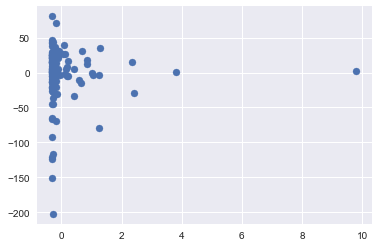

In [107]:
# Plot against num_cust_reviews
# It seems that is a little bit of heteroskidasticity. We should try to make num_cust_reviews a degree up 
plt.scatter(X_train[:,0], linear_predictions_train - y_train)

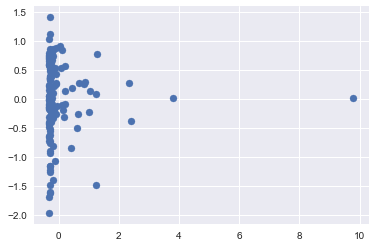

In [108]:
# looks about the same when comparing to log price
# That said, it looks more scattered with the log price but the error amoung is much smaller
plt.scatter(X_train_log[:,0], linear_predictions_train_log - y_train_log)

### Check avg_cust_review

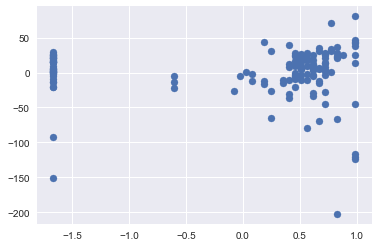

In [109]:
# It looks like there is definitely heteroskidastiticy.
# Therefore, we should probably apply another feature that is avg_cust_review degree 2
plt.scatter(X_train[:,1], linear_predictions_train - y_train)

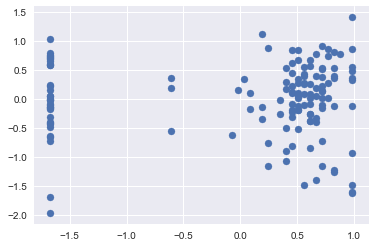

In [110]:
# Just as with num_cust_review, avg_cust_review seems to have more heteroskidasticity with the log_price, but lower error values
plt.scatter(X_train_log[:,1], linear_predictions_train_log - y_train_log)

### Check num_answered_questions

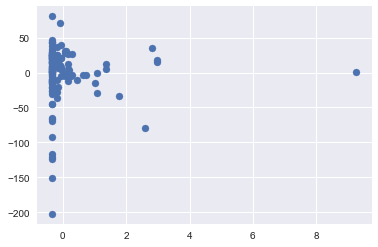

In [111]:
# It seems like there might be heteroskidasticity, but not much
plt.scatter(X_train[:,2], linear_predictions_train - y_train)

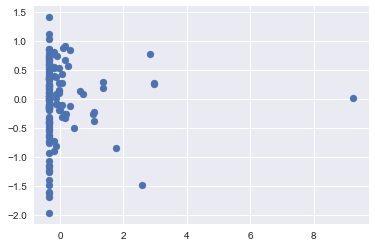

In [112]:
plt.scatter(X_train_log[:,2], linear_predictions_train_log - y_train_log)

### Check time_on_market

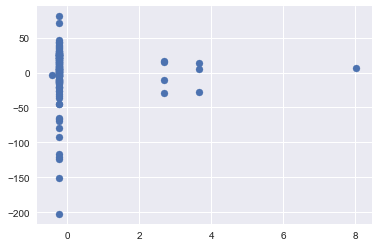

In [113]:
# Not much to see, except that there is isn't much error but there isn't much else to get out of the feature
plt.scatter(X_train[:,3], linear_predictions_train - y_train)

### Check other_sellers_boolean

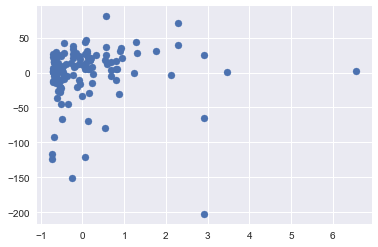

In [114]:
# There's one odd outlier at 12, but everything else is a 0 value. 
plt.scatter(X_train[:,4], linear_predictions_train - y_train)

### Check the num_bullets_description

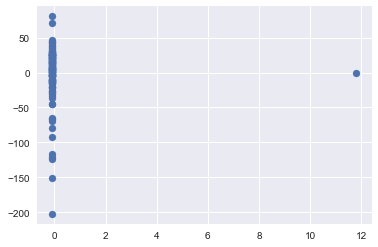

In [115]:
# There seems to be a pattern with the errors along the zero axis, so we might have a good feature here
plt.scatter(X_train[:,5], linear_predictions_train - y_train)

### Check the product_specs_image_boolean

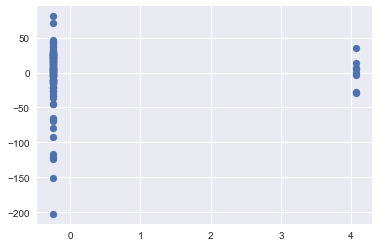

In [116]:
# Not much to do with this feature
plt.scatter(X_train[:,6], linear_predictions_train - y_train)

### Check the num_specs_bullets

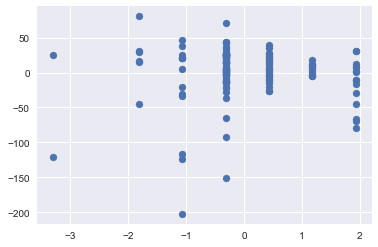

In [117]:
# Aside from the values that are oddly below 0, it seems like most of the values are around the 0 error, which is great!
plt.scatter(X_train[:,7], linear_predictions_train - y_train)

### Check clothing_seller_rank

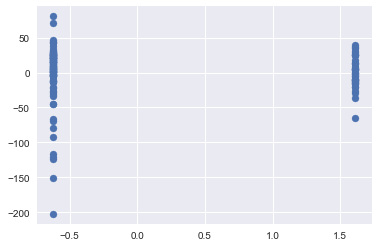

In [118]:
# There seems to be a little bit of heteroskidasticity
# We might want to make a new feature of degree 2 out of this feature
plt.scatter(X_train[:,8], linear_predictions_train - y_train)

### Check seller_rank_binary_list

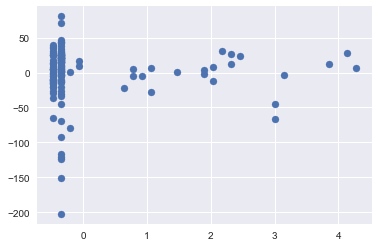

In [119]:
# Not sure if this feature is valuable
plt.scatter(X_train[:,9], linear_predictions_train - y_train)

### Check the num_cust_review_squared

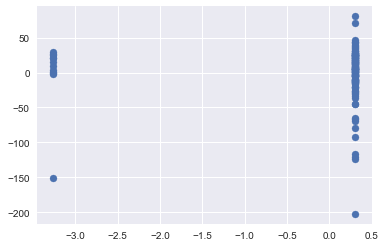

In [120]:
# The heteroscidasticity is removed when you add the degree to this feature. So that seems good?
plt.scatter(X_train[:,10], linear_predictions_train - y_train)

### Check the avg_cust_review_squared

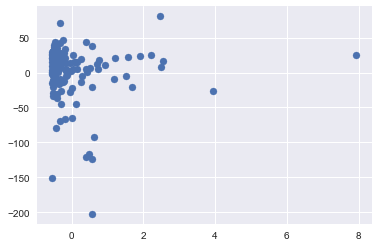

In [121]:
# The heteroscidasticity is reduced when we add a degree to the avg_cust_review feature
plt.scatter(X_train[:,11], linear_predictions_train - y_train)

### num_answered_questions_squared

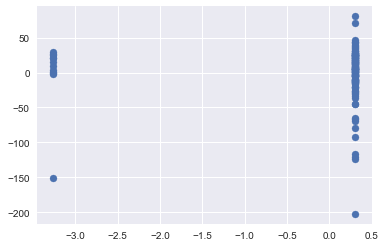

In [122]:
# The heteroscidasticity is completely removed when I add a degree to num_answered_questions
plt.scatter(X_train[:,12], linear_predictions_train - y_train)

# Obtain baseline linear fits

Text(0.5,1,'Linear Regression Model on Training Data')

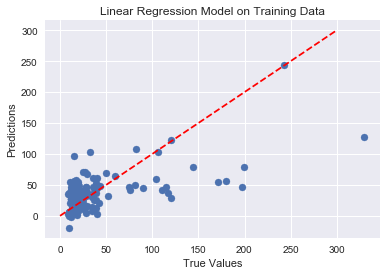

In [123]:
# It looks like this linear regression model is not fitting well my training data. 
# Let's check the validation data
plt.scatter(y_train, linear_predictions_train)
plt.plot([0,300],[0,300],'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model on Training Data')


Text(0.5,1,'Linear Regression Model on Training Data against Log_price')

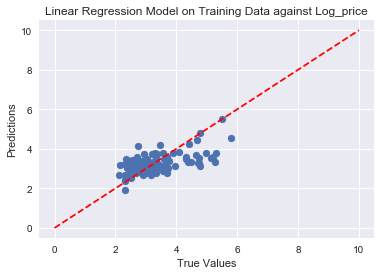

In [124]:
# It seems to be fitting better on the log_price training set.
plt.scatter(y_train_log, linear_predictions_train_log)
plt.plot([0,10],[0,10],'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model on Training Data against Log_price')

In [125]:
# Since my R^2 is negative, I believe I need to add degrees to my linear model 
linear_model_fit_log.score(X_val_log, y_val_log)

-0.18103006483752848

Text(0.5,1,'Linear Regression Model on Validation Data')

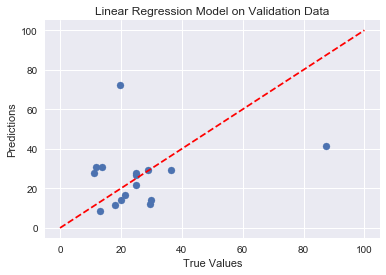

In [126]:
# It looks like the linear regression model is not a good fit for the validation data
plt.scatter(y_val, linear_predictions_validation)
plt.plot([0,100],[0,100],'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Model on Validation Data')

In [127]:
# It looks like our accuracy for the linear model is not good, which is apparent in the above plot
linear_model_fit.score(X_val, y_val)

-1.7355563327860821

# Conclusions from linear fit plots and scores
Since we're not fitting well for neither the test nor training data, we are in high bias.
Therefore, we should try adding features to get our model to fit at least the training data. Since I've already added all the features I think I need, I will try using a polynomial function. The current goal is to get to a point of fitting the training set better.

In [128]:
all_product_listings_for_modeling_list_price.columns

Index(['num_cust_reviews', 'list_price', 'avg_cust_review',
       'num_answered_questions', 'product_discounts', 'time_on_market',
       'other_sellers_boolean', 'expedited_shipping_boolean',
       'num_bullets_description', 'product_specs_image_boolean',
       'num_specs_bullets', 'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'num_cust_review_squared',
       'avg_cust_review_squared', 'num_answered_questions_squared'],
      dtype='object')

In [129]:
# Added the squared features and it seems that my adjusted R-squared went up, slightly
# I believe I have some colinearity between other_sellers_boolean and expedited_shipping_boolean, since they 
    # have basically the same values (zeros) because there was very few examples of those in my products set
# Create your feature matrix (X) and target vector (y)
y_patsy, X_patsy = patsy.dmatrices('list_price ~ num_cust_reviews + avg_cust_review + num_answered_questions + product_discounts + time_on_market + seller_rank_boolean + other_sellers_boolean + expedited_shipping_boolean + clothing_seller_rank + seller_rank_binary_list + num_bullets_description + product_specs_image_boolean + num_specs_bullets + num_answered_questions_squared + avg_cust_review_squared + num_answered_questions_squared', data=all_product_listings_for_modeling_list_price, return_type="dataframe")
# Create your model
added_degree_2_OLS = sm.OLS(y_patsy, X_patsy)
# Fit your model to your training set
fit_degree2 = added_degree_2_OLS.fit()
# Print summary statistics of the model's performance
fit_degree2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     5.664
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           1.26e-08
Time:                        07:23:30   Log-Likelihood:                -783.20
No. Observations:                 156   AIC:                             1596.
Df Residuals:                     141   BIC:                             1642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         46.0840     14.803      3.113      0.002      16.820      75.348
num_cust_reviews                  -0.0138      0.008     -1.740      0.084      -0.030       0.002
avg_cust_review                  -22.8261      9.951     -2.294      0.023     -42.498      -3.154
num_answered_questions            -0.3104      0.382     -0.813      0.418      -1.066       0.445
product_discounts                -29.2255     90.618     -0.323      0.748    -208.371     149.920
time_on_market                     0.0314      0.006      5.010      0.000       0.019       0.044
seller_rank_boolean               -6.2347      7.067     -0.882      0.379     -20.206       7.737
other_sellers_boolean            -17.8362     46.257     -0.386      0.700    -109.282      73.610
expedited_shipping_boolean        10.4332     21.792      0.479      0.633     -32.647      53.514
clothing_seller_rank            1.147e-05   1.03e-05      1.114      0.267   -8.89e-06    3.18e-05
seller_rank_binary_list           -6.2347      7.067     -0.882      0.379     -20.206       7.737
num_bullets_description           -2.6327      2.749     -0.958      0.340      -8.067       2.801
product_specs_image_boolean      -16.8231      7.897     -2.130      0.035     -32.434      -1.212
num_specs_bullets                  0.1790      0.513      0.349      0.728      -0.835       1.193
num_answered_questions_squared     0.0056      0.002      2.443      0.016       0.001       0.010
avg_cust_review_squared            5.4876      2.073      2.648      0.009       1.390       9.585
==============================================================================
Omnibus:                       98.381   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.756
Skew:                           2.329   Prob(JB):                    7.77e-127
Kurtosis:                      11.225   Cond. No.                     7.48e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.85e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [130]:
# Tried removing the other sellers boolean, and that increased the Adj. R-Squared 
# Going to try to remove product discounts, since the p-value is pretty high
y_patsy, X_patsy = patsy.dmatrices('list_price ~ num_cust_reviews + avg_cust_review + num_answered_questions + product_discounts + time_on_market + seller_rank_boolean + expedited_shipping_boolean + clothing_seller_rank + seller_rank_binary_list + num_bullets_description + product_specs_image_boolean + num_specs_bullets + num_answered_questions_squared + avg_cust_review_squared + num_answered_questions_squared', data=all_product_listings_for_modeling_list_price, return_type="dataframe")
# Create your model
added_degree_2_OLS_removed_other_sellers = sm.OLS(y_patsy, X_patsy)
# Fit your model to your training set
fit_degree2 = added_degree_2_OLS_removed_other_sellers.fit()
# Print summary statistics of the model's performance
fit_degree2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     6.125
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           5.25e-09
Time:                        07:23:30   Log-Likelihood:                -783.28
No. Observations:                 156   AIC:                             1595.
Df Residuals:                     142   BIC:                             1637.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         44.9490     14.464      3.108      0.002      16.357      73.541
num_cust_reviews                  -0.0140      0.008     -1.766      0.080      -0.030       0.002
avg_cust_review                  -22.8778      9.920     -2.306      0.023     -42.488      -3.268
num_answered_questions            -0.2917      0.378     -0.772      0.441      -1.039       0.455
product_discounts                -16.8224     84.462     -0.199      0.842    -183.789     150.144
time_on_market                     0.0317      0.006      5.084      0.000       0.019       0.044
seller_rank_boolean               -5.6607      6.888     -0.822      0.413     -19.277       7.955
expedited_shipping_boolean         6.4232     19.093      0.336      0.737     -31.319      44.166
clothing_seller_rank            1.144e-05   1.03e-05      1.114      0.267   -8.86e-06    3.17e-05
seller_rank_binary_list           -5.6607      6.888     -0.822      0.413     -19.277       7.955
num_bullets_description           -2.6408      2.740     -0.964      0.337      -8.058       2.777
product_specs_image_boolean      -17.0986      7.841     -2.181      0.031     -32.598      -1.599
num_specs_bullets                  0.1819      0.511      0.356      0.722      -0.829       1.193
num_answered_questions_squared     0.0055      0.002      2.422      0.017       0.001       0.010
avg_cust_review_squared            5.4983      2.066      2.661      0.009       1.414       9.583
==============================================================================
Omnibus:                       98.042   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              575.144
Skew:                           2.322   Prob(JB):                    1.29e-125
Kurtosis:                      11.180   Cond. No.                     1.98e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.49e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [131]:
# Tried removing the other sellers boolean already, now also removing product discounts
# My adjusted r-squared increased slightly 
# Going to try and remove expedited_shipping_boolean as well, since it also has a high p-value 
y_patsy, X_patsy = patsy.dmatrices('list_price ~ num_cust_reviews + avg_cust_review + num_answered_questions + time_on_market + seller_rank_boolean + expedited_shipping_boolean + clothing_seller_rank + seller_rank_binary_list + num_bullets_description + product_specs_image_boolean + num_specs_bullets + num_answered_questions_squared + avg_cust_review_squared + num_answered_questions_squared', data=all_product_listings_for_modeling_list_price, return_type="dataframe")
# Create your model
added_degree_2_OLS_removed_other_sellers_and_product_discounts = sm.OLS(y_patsy, X_patsy)
# Fit your model to your training set
fit_degree2 = added_degree_2_OLS_removed_other_sellers_and_product_discounts.fit()
# Print summary statistics of the model's performance
fit_degree2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     6.676
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           1.99e-09
Time:                        07:23:30   Log-Likelihood:                -783.30
No. Observations:                 156   AIC:                             1593.
Df Residuals:                     143   BIC:                             1632.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         44.7819     14.391      3.112      0.002      16.336      73.228
num_cust_reviews                  -0.0141      0.008     -1.807      0.073      -0.030       0.001
avg_cust_review                  -22.9670      9.877     -2.325      0.021     -42.490      -3.444
num_answered_questions            -0.2813      0.373     -0.754      0.452      -1.018       0.456
time_on_market                     0.0319      0.006      5.212      0.000       0.020       0.044
seller_rank_boolean               -5.7005      6.862     -0.831      0.407     -19.264       7.863
expedited_shipping_boolean         4.0383     14.821      0.272      0.786     -25.258      33.334
clothing_seller_rank            1.144e-05   1.02e-05      1.118      0.265   -8.78e-06    3.17e-05
seller_rank_binary_list           -5.7005      6.862     -0.831      0.407     -19.264       7.863
num_bullets_description           -2.5965      2.722     -0.954      0.342      -7.977       2.784
product_specs_image_boolean      -17.1547      7.809     -2.197      0.030     -32.591      -1.718
num_specs_bullets                  0.1705      0.506      0.337      0.737      -0.830       1.171
num_answered_questions_squared     0.0055      0.002      2.423      0.017       0.001       0.010
avg_cust_review_squared            5.5131      2.058      2.679      0.008       1.445       9.581
==============================================================================
Omnibus:                       97.817   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.879
Skew:                           2.318   Prob(JB):                    1.08e-124
Kurtosis:                      11.145   Cond. No.                     6.03e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.92e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Highest adj. R-squared achieved here

In [132]:
# Removed expedited_shipping_boolean
# The adjusted R-squared went up. I think it's a good time to take a look at the polynomials

y_patsy, X_patsy = patsy.dmatrices('list_price ~ num_cust_reviews + avg_cust_review + num_answered_questions + time_on_market + seller_rank_boolean + clothing_seller_rank + seller_rank_binary_list + num_bullets_description + product_specs_image_boolean + num_specs_bullets + num_answered_questions_squared + avg_cust_review_squared + num_answered_questions_squared', data=all_product_listings_for_modeling_list_price, return_type="dataframe")
# Create your model
added_degree_2_OLS_removed_other_sellers_and_product_discounts_and_expedited_shipping = sm.OLS(y_patsy, X_patsy)
# Fit your model to your training set
fit_degree2 = added_degree_2_OLS_removed_other_sellers_and_product_discounts_and_expedited_shipping.fit()
# Print summary statistics of the model's performance
fit_degree2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     7.324
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           7.31e-10
Time:                        07:23:30   Log-Likelihood:                -783.34
No. Observations:                 156   AIC:                             1591.
Df Residuals:                     144   BIC:                             1627.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         45.2190     14.255      3.172      0.002      17.043      73.395
num_cust_reviews                  -0.0141      0.008     -1.805      0.073      -0.030       0.001
avg_cust_review                  -23.0523      9.840     -2.343      0.021     -42.501      -3.603
num_answered_questions            -0.2707      0.370     -0.732      0.465      -1.001       0.460
time_on_market                     0.0319      0.006      5.234      0.000       0.020       0.044
seller_rank_boolean               -5.8467      6.819     -0.857      0.393     -19.325       7.631
clothing_seller_rank            1.145e-05   1.02e-05      1.122      0.264   -8.71e-06    3.16e-05
seller_rank_binary_list           -5.8467      6.819     -0.857      0.393     -19.325       7.631
num_bullets_description           -2.6715      2.700     -0.990      0.324      -8.007       2.664
product_specs_image_boolean      -16.6608      7.572     -2.200      0.029     -31.626      -1.695
num_specs_bullets                  0.2076      0.486      0.427      0.670      -0.753       1.168
num_answered_questions_squared     0.0054      0.002      2.416      0.017       0.001       0.010
avg_cust_review_squared            5.5347      2.050      2.700      0.008       1.483       9.586
==============================================================================
Omnibus:                       97.353   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.895
Skew:                           2.306   Prob(JB):                    2.16e-123
Kurtosis:                      11.102   Cond. No.                     4.63e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Re-conduct test/train split (on same seed) with the reduced list of features

In [133]:
all_product_listings_for_modeling_list_price.columns

Index(['num_cust_reviews', 'list_price', 'avg_cust_review',
       'num_answered_questions', 'product_discounts', 'time_on_market',
       'other_sellers_boolean', 'expedited_shipping_boolean',
       'num_bullets_description', 'product_specs_image_boolean',
       'num_specs_bullets', 'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'num_cust_review_squared',
       'avg_cust_review_squared', 'num_answered_questions_squared'],
      dtype='object')

In [134]:
final_list_features = ['num_cust_reviews', 'avg_cust_review', 'num_answered_questions', 'time_on_market', 'seller_rank_boolean', 'clothing_seller_rank', 'seller_rank_binary_list', 'num_bullets_description', 'product_specs_image_boolean', 'num_specs_bullets', 'num_answered_questions_squared', 'avg_cust_review_squared', 'num_answered_questions_squared']

In [135]:
original_list_features = list(all_product_listings_for_modeling_list_price.columns)

In [136]:
removed_features = list(set(original_list_features) - set(final_list_features))
removed_features

['other_sellers_boolean',
 'product_discounts',
 'list_price',
 'expedited_shipping_boolean',
 'num_cust_review_squared']

In [137]:
all_product_listings_for_modeling_list_price.columns

Index(['num_cust_reviews', 'list_price', 'avg_cust_review',
       'num_answered_questions', 'product_discounts', 'time_on_market',
       'other_sellers_boolean', 'expedited_shipping_boolean',
       'num_bullets_description', 'product_specs_image_boolean',
       'num_specs_bullets', 'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'num_cust_review_squared',
       'avg_cust_review_squared', 'num_answered_questions_squared'],
      dtype='object')

In [138]:
all_product_listings_for_modeling_list_price_removed_features = all_product_listings_for_modeling_list_price.drop(columns=['product_discounts', 'expedited_shipping_boolean', 'num_cust_review_squared', 'other_sellers_boolean'])
all_product_listings_for_modeling_list_price_removed_features.head(5)

,num_cust_reviews,list_price,avg_cust_review,num_answered_questions,time_on_market,num_bullets_description,product_specs_image_boolean,num_specs_bullets,seller_rank_boolean,clothing_seller_rank,seller_rank_binary_list,avg_cust_review_squared,num_answered_questions_squared
0,16.0,74.99,4.5,3.0,141.0,4,0,11,1,160578,1,20.25,9.0
1,58.0,13.99,4.2,3.0,942.0,6,1,0,1,28641,1,17.64,9.0
2,810.0,9.99,4.5,20.0,70.0,4,0,1,1,9697,1,20.25,400.0
3,214.0,11.29,4.2,12.0,376.0,6,0,9,1,2635,1,17.64,144.0
4,316.0,8.39,4.3,12.0,268.0,6,1,0,1,14727,1,18.49,144.0


In [139]:
all_product_listings_for_modeling_log_price_removed_features = all_product_listings_for_modeling_log_price.drop(columns=['product_discounts', 'expedited_shipping_boolean', 'num_cust_review_squared', 'other_sellers_boolean'])
all_product_listings_for_modeling_log_price_removed_features.head(5)

,num_cust_reviews,avg_cust_review,num_answered_questions,time_on_market,num_bullets_description,product_specs_image_boolean,num_specs_bullets,seller_rank_boolean,clothing_seller_rank,seller_rank_binary_list,log_price,avg_cust_review_squared,num_answered_questions_squared
0,16.0,4.5,3.0,141.0,4,0,11,1,160578,1,4.317355,20.25,9.0
1,58.0,4.2,3.0,942.0,6,1,0,1,28641,1,2.638343,17.64,9.0
2,810.0,4.5,20.0,70.0,4,0,1,1,9697,1,2.301585,20.25,400.0
3,214.0,4.2,12.0,376.0,6,0,9,1,2635,1,2.423917,17.64,144.0
4,316.0,4.3,12.0,268.0,6,1,0,1,14727,1,2.127041,18.49,144.0


In [140]:
X_new = all_product_listings_for_modeling_list_price_removed_features[[x for x in all_product_listings_for_modeling_list_price_removed_features.columns if x != 'list_price']]
y_new = all_product_listings_for_modeling_list_price_removed_features['list_price']
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_new, y_new, test_size=0.3, random_state=30)

In [141]:
# Scale the train and validation data
ssX = StandardScaler()
 
# Fit_transform figures fit(out mean and std). 
# Then transforms (using the value from the fit x-mu for each datapoint)

# Fit and transform the training data
X_train_new = ssX.fit_transform(X_train_new)

# Validate and transform the validation data
X_val_new = ssX.transform(X_val_new)

In [142]:
X_new_log = all_product_listings_for_modeling_log_price_removed_features[[x for x in all_product_listings_for_modeling_log_price_removed_features.columns if x != 'log_price']]
y_new_log = all_product_listings_for_modeling_log_price_removed_features['log_price']
X_train_new_log, X_val_new_log, y_train_new_log, y_val_new_log = train_test_split(X_new_log, y_new_log, test_size=0.3, random_state=30)

In [143]:
# Scale the train and validation data
ssX = StandardScaler()
 
# Fit_transform figures fit(out mean and std). 
# Then transforms (using the value from the fit x-mu for each datapoint)

# Fit and transform the training data
X_train_new_log = ssX.fit_transform(X_train_new_log)

# Validate and transform the validation data
X_val_new_log = ssX.transform(X_val_new_log)

# Generate second degree polynomial and interaction features

In [144]:
poly_degree2_fit = PolynomialFeatures(2).fit(X_train_new)

In [145]:
X_train_poly_degree2 = poly_degree2_fit.transform(X_train_new)

In [146]:
poly_degree2_fit_log = PolynomialFeatures(2).fit(X_train_new_log)

In [147]:
X_train_poly_degree2_log = poly_degree2_fit_log.transform(X_train_new_log)

# Plot the data with the additional features from the second degree poly

In [148]:
linear_model_poly_degree2 = LinearRegression()

In [149]:
linear_model_poly_degree2_fit = linear_model_poly_degree2.fit(X_train_poly_degree2, y_train_new)

In [150]:
linear_poly_degree2_predictions_train = linear_model_poly_degree2.predict(X_train_poly_degree2)

Text(0.5,1,'Polynomial Degree 2 Model on Training Data for Price')

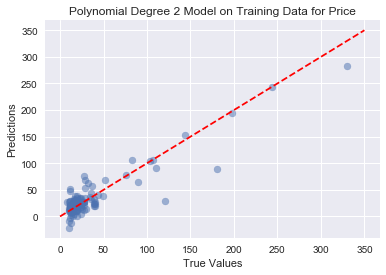

In [151]:
# This polynomial degree of 2 fits better than the original linear regression degree of 1
# It's still not over-fitting, so let's try another degree 
plt.scatter(y_train_new, linear_poly_degree2_predictions_train, alpha=0.5)
plt.plot([0,350],[0,350],'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 2 Model on Training Data for Price')

In [152]:
linear_model_poly_degree2_fit_log = linear_model_poly_degree2.fit(X_train_poly_degree2_log, y_train_new_log)

In [153]:
linear_poly_degree2_predictions_train_log = linear_model_poly_degree2.predict(X_train_poly_degree2_log)

Text(0.5,1,'Polynomial Degree 2 Model on Training Data for Price_Log')

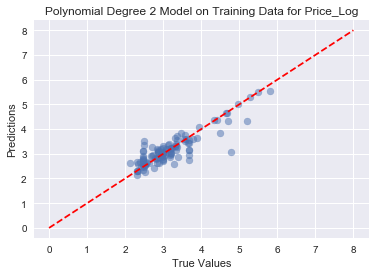

In [154]:
plt.scatter(y_train_new_log, linear_poly_degree2_predictions_train_log, alpha=0.5)
plt.plot([0,8],[0,8],'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Polynomial Degree 2 Model on Training Data for Price_Log')

# Generate third degree polynomial and interaction features

In [155]:
poly_degree3_fit = PolynomialFeatures(3).fit(X_train_new)

In [156]:
X_train_poly_degree3 = poly_degree3_fit.transform(X_train_new)

In [157]:
poly_degree3_fit_log = PolynomialFeatures(3).fit(X_train_new_log)

In [158]:
X_train_poly_degree3_log = poly_degree3_fit_log.transform(X_train_new_log)

# DEPRECATED: Plot the data with the additional features from the third degree poly

In [159]:
linear_model_poly_degree3 = LinearRegression()

In [160]:
linear_model_poly_degree3_fit = linear_model_poly_degree3.fit(X_train_poly_degree3, y_train_new)

In [161]:
linear_poly_degree3_predictions_train = linear_model_poly_degree3.predict(X_train_poly_degree3)

In [162]:
# This polynomial degree of 3 fits much better than the degree of 2 and of 1
# It might be overfitting already, but it's try degree of 4
# plt.scatter(y_train, linear_poly_degree3_predictions_train, alpha=0.5)
# plt.plot([0,500],[0,500],'r--')
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.title('Polynomial Degree 3 Model on Training Data')
# plt.savefig('Third_degree_polynomial_on_training', xbbox_inches='tight')

In [163]:
linear_model_poly_degree3_fit_log = linear_model_poly_degree3.fit(X_train_poly_degree3_log, y_train_new_log)

In [164]:
linear_poly_degree3_predictions_train_log = linear_model_poly_degree3_fit_log.predict(X_train_poly_degree3_log)

In [165]:
# plt.scatter(y_train_log, linear_poly_degree3_predictions_train_log, alpha=0.5)
# plt.plot([0,10],[0,10],'r--')
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.title('Polynomial Degree 3 Model on Training Data')
# plt.savefig('Third_degree_polynomial_on_training', xbbox_inches='tight')

# Review all of the degrees

In [166]:
# Step through degrees from 0 to 9 and store the training and test (generalization) error.
train_error = np.empty(10)
val_error = np.empty(10)
for degree in range(10):
    est = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    est.fit(X_train_new_log, y_train_new_log)
    train_error[degree] = mean_squared_error(y_train_new_log, est.predict(X_train_new_log))
    val_error[degree] = mean_squared_error(y_val_new_log, est.predict(X_val_new_log))

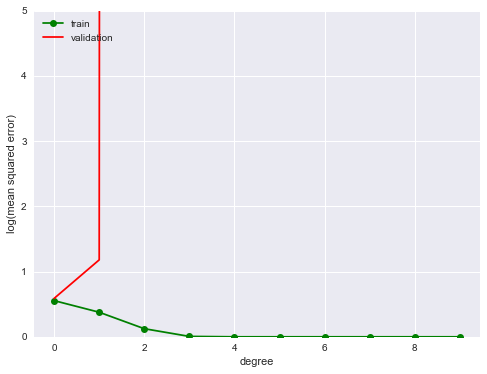

In [167]:
# Plot the training and test errors against degree
plt.figure(figsize=(8,6))
plt.plot(np.arange(10), train_error, marker='o', color='green', label='train')
plt.plot(np.arange(10), val_error, color='red', label='validation')
plt.ylim((0.0, 5))
plt.ylabel('log(mean squared error)')
plt.xlabel('degree')
plt.legend(loc='upper left');

# Summary of findings from trying different polynomials
The pipeline chart above confirms that I need to use a first degree polynomial or I need to use a second degree and then significantly regularize. I will try using the first degree. Also, the findings throughout showed that using the log_price as a target was a much better fit, so I will use log_price.

# Apply the first degree linear regression on the new set of features for log

In [168]:
# Fit the training data to the linear model
linear_model_fit = lm.fit(X_train_new, y_train_new)

# Apply the linear model to the validation data to obtain predictions 
linear_predictions_validation_new = lm.predict(X_val_new)

In [169]:
# Fit the training data to the linear model
linear_model_fit_log = lm.fit(X_train_new_log, y_train_new_log)

# Apply the linear model to the validation data to obtain predictions 
linear_predictions_validation_log_new = lm.predict(X_val_new_log)
linear_predictions_validation_log_new

array([ 1.93657612,  3.11234817,  2.93113945,  3.21663007,  2.84175509,
        2.98458629,  2.88842669,  2.7805221 ,  2.81605163,  3.08521714,
        3.36369747,  3.05037829,  3.57288984,  2.8575981 ,  2.9274063 ,
        3.11352562,  3.36489831,  3.10190342,  2.82609895,  3.2000998 ,
        2.83515003, -0.79359703,  3.23313231,  3.22206882,  3.02814466,
        3.1906748 ,  2.79029965,  3.26650927,  3.2830728 ,  3.07071417,
        2.91836944,  2.43133223,  2.652452  ,  3.23690032,  3.21817093,
        3.36019519,  3.38018302,  3.2875554 ,  3.30800169,  3.66036361,
        3.23451903,  2.96381498,  3.54127123,  3.17374277,  3.1610101 ,
        2.70890493,  2.84696496])

Text(0.5,1,'Linear Regression Degree 1 Model on Training Data targeting Price')

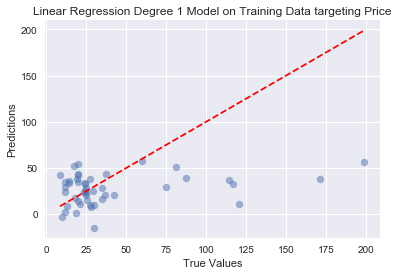

In [170]:
plt.scatter(y_val_new, linear_predictions_validation_new, alpha=0.5)
plt.plot([min(y_val_new),max(y_val_new)],[min(y_val_new),max(y_val_new)],'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Degree 1 Model on Training Data targeting Price')

In [171]:
residuals = y_val_new - linear_predictions_validation_new

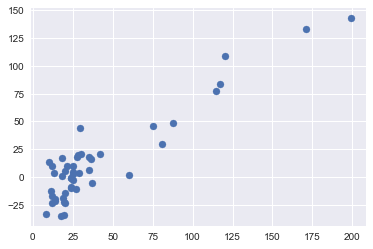

In [172]:
# According to this graph, my model has basically no predictive power. 
# There might be something for any price below 50, but beyond that price, it is worthless
plt.scatter(y_val_new, residuals)

# Final graph

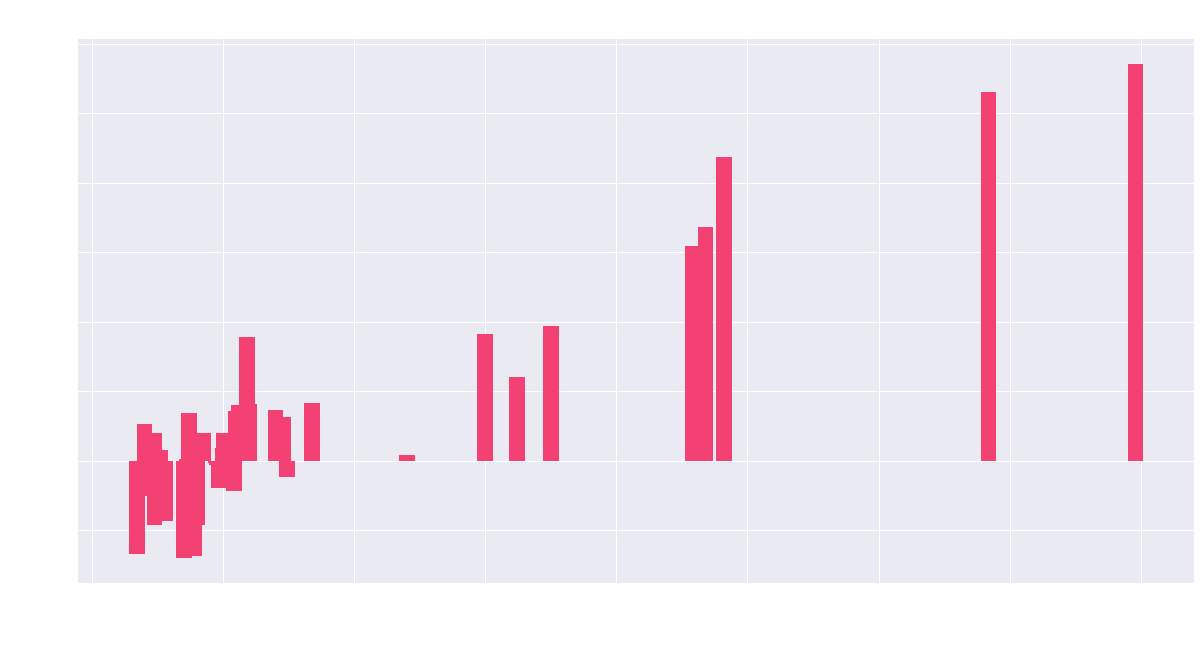

In [173]:
# Changed the font colors to be good for my presentation background, that's why the text is not visible here
ax = plt.figure(figsize=(20,10))
#plt.axis('off')
final_bar = plt.bar(y_val_new, residuals, width=3, color='#f44174')
plt.title('Mean Absolute Errors in Price Predictions V Actual Prices', size=35, color='white')
plt.xlabel('Actual Prices ($)', size=27, color='white')
plt.ylabel('Mean Absolute Error in Price Prediction ($)', size=27, color='white')
plt.xticks(size=20, color='white')
plt.yticks(size=20, color='white')
plt.savefig('Project2_FinalPlot', xbbox_inches='tight', transparent=True)


/Users/Victoria/anaconda/envs/ds/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


NameError: name 'xticklabels' is not defined

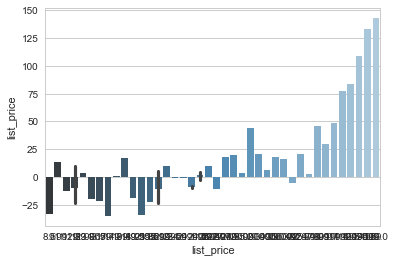

In [174]:
sns.set_style("whitegrid")
final_plot = sns.barplot(y_val_new, residuals, palette="Blues_d")
final_plot.set(xticklabels(np.arange(50, 200, 25)))
sns.figure(figsize=(80,10))

In [ ]:
plt.scatter(y_val_new_log, linear_predictions_validation_log_new, alpha=0.5)
plt.plot([0,10],[0,10],'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [ ]:
plt.title('Linear Regression Degree 1 Model on Training Data targeting Log Price')

In [ ]:
mean_absolute_error(y_val_new, linear_predictions_validation_new)

# DEPRECATED: Apply regularization to third degree polynomial model

I realized that I didn't need to use a third degree polynomial anymore. 

In [ ]:
linear_model_poly_degree2_fit = Ridge(max_iter=5000)
parameters = {'alpha': np.logspace(1e-8, 2, 10)}
grid = GridSearchCV(linear_model_poly_degree2_fit,parameters, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

In [ ]:
grid.fit(X_train_poly_degree2,y_train_new)

In [ ]:
np.logspace(1e-8, 2, 10)